# (Ford GoBike Dataset 2019)
## by (Ahmed Osama)

## Investigation Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The goal is to assess and clean this data set to make it ready for the analysis, Then perform some Uni-variate, Bi-variate and Multi-variate analysis to get some useful and inspiring Insights!

## Dataset Overview

> This data set includes 183412 records about individual rides information made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. It contains information like the start and end stations of the trip, start and end dates, Bike ID, Memebers birth date, Trips Duration and etc..

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_copy = df.copy()

# First of all, Drop all unneeded columns
df_copy = df_copy.drop(['start_station_latitude', 'start_station_longitude',
              'end_station_latitude', 'end_station_longitude', 'bike_id', 'start_station_id', 'end_station_id' ], axis = 1)

# now we will drop the records that have null values for columns
# [start_station_name & end_station_name] as they are only 197 record
# and they will not affect our analysis.

# Getting the index of those columns.
start_null_index = df_copy[df_copy['start_station_name'].isnull()].index.tolist()

# Dropping those rows.
df_copy.drop(start_null_index, axis = 0, inplace= True)

# checking if there is null values remain
df_copy.isnull().sum()

# Filling the missing values in gender column 
# by filling it with `other`.

df_copy['member_gender'].fillna('Other', inplace = True)
# test
df_copy.isnull().sum()


df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])
df_copy['user_type'] = df_copy['user_type'].astype('category')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')


df_copy['duration_minute'] = df_copy['duration_sec']/60
df_copy['duration_minute'] = df_copy['duration_minute'].astype(int)

df_copy['start_date'] = df_copy.start_time.dt.strftime('%Y-%m-%d')
df_copy['start_hour'] = df_copy.start_time.dt.strftime('%H')
df_copy['start_day'] = df_copy.start_time.dt.strftime('%A')

df_copy['member_age'] = 2021 - df_copy['member_birth_year']

# Remove the outliers.
df_copy = df_copy.query('member_age <= 75')

# Converting the column type to Integer.
df_copy['member_age'] = df_copy['member_age'].astype(int)

df_copy = df_copy.query('duration_minute <= 60')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173241 entries, 4 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173241 non-null  int64         
 1   start_time               173241 non-null  datetime64[ns]
 2   end_time                 173241 non-null  datetime64[ns]
 3   start_station_name       173241 non-null  object        
 4   end_station_name         173241 non-null  object        
 5   user_type                173241 non-null  category      
 6   member_birth_year        173241 non-null  float64       
 7   member_gender            173241 non-null  category      
 8   bike_share_for_all_trip  173241 non-null  category      
 9   duration_minute          173241 non-null  int32         
 10  start_date               173241 non-null  object        
 11  start_hour               173241 non-null  object        
 12  start_day       

## Trip duration distribution variation between User Type and Member gender 

> It seems that the gender doesn't affect so much on the duration compared to the User type. the genders are all close to each other. But for the types, the majority of the subscribers take a `1 to 10` trip duration. And the majority of the customer take a `8 to 20` trip duration.

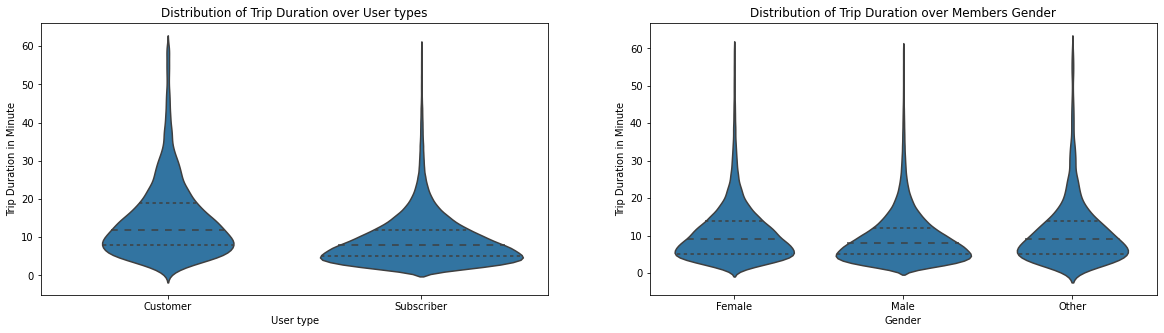

In [18]:
plt.figure(figsize=[20,5])
base_color = sb.color_palette()[0]

plt.subplot(1,2,2)
sb.violinplot(data=df_copy, x='member_gender', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title('Distribution of Trip Duration over Members Gender');


plt.subplot(1,2,1)
sb.violinplot(data=df_copy, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User type');
plt.ylabel('Trip Duration in Minute');
plt.title('Distribution of Trip Duration over User types');



## Distribution of genders over the week days

> This plot isn't fair enough because the number of Males is much bigger than the others. But, from this plot. The peak for all genders is `Thursday` in San Fransisco!, In general the number of trips increases for the weekends. and goes lower in the working days

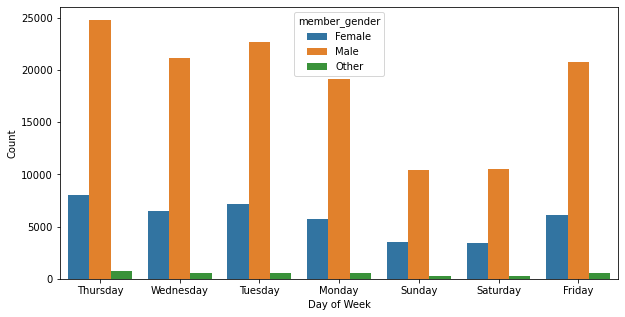

In [19]:
plt.figure(figsize=[10,5])
sb.countplot(data=df_copy, x='start_day', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');

## Distribution of Average Trip Duration over Members Ages for Member Genders

> This plot is inspiring! it shows that majority  of the `other` type of genders are between `25 to 50` years old, and they spend from `5 to 30` minutes in the trip. But for females due to the very small number of them there is no interesting insights

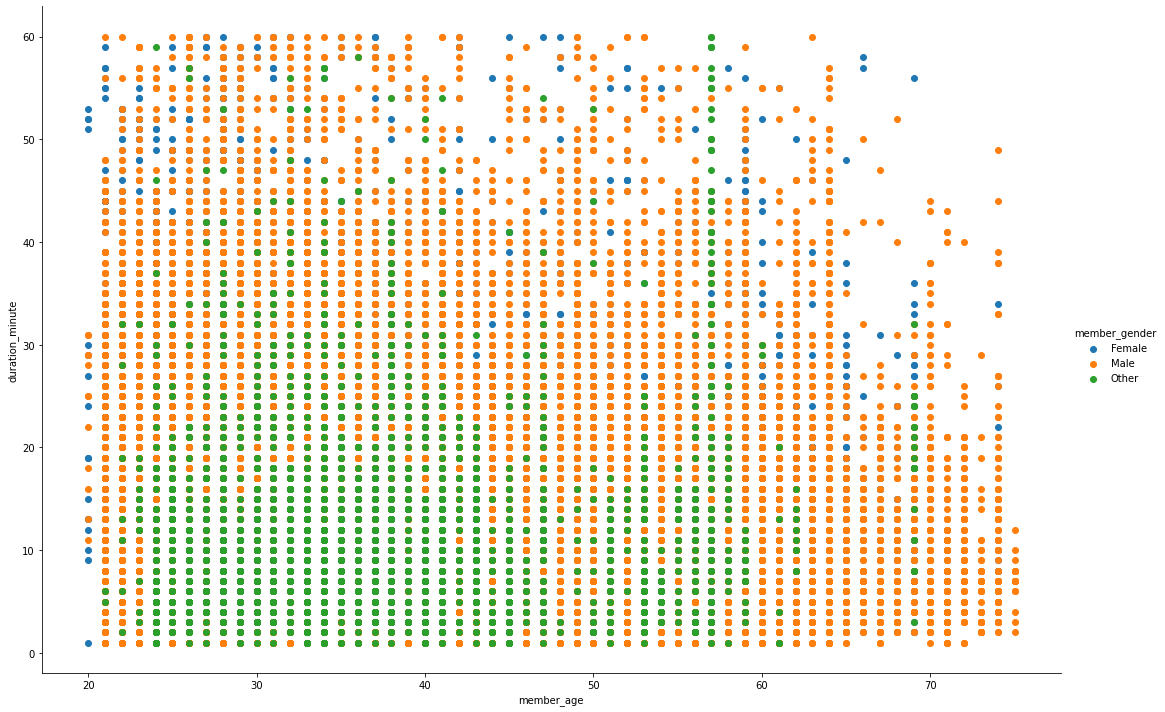

In [22]:
g = sb.FacetGrid(data = df_copy, hue = 'member_gender', size = 10,
                 aspect = 1.5)
g.map(plt.scatter, 'member_age', 'duration_minute')
g.add_legend();

# Summary
> Univariate Exploration: For the Duration and times. The Most of trips have a rush hour range around `8-9am` and `17-18pm` during a day, there were more trips on work days `(Thursday - Tuesday)` working days compared to weekends. Most of trips were within `30 Minutes Duration` and the peaks within `5 to 15 Minutes`.

> Bivariate Exploration: The `gender` doesn't affect so much on the trip duration compared to the `User type`, Also the average trip durations are almost the same over the week days except for `Saturday and Sunday`, They have a higher average. 

> The Multivariate Exploration: strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration and it discovered some new insights, the relationship between the multiple variables `Age - Duration - Gender` are plotted. Showing some new insights like the average age for the `Other` gender type and the average duration trip.